# Introduction

### Project Purpose
This case study was completed as a part of my Google Data Analytics Professional Certification.  It served as the final project for the class.  It is my very first analysis in R.

## Scenario
#### from Capstone Project outline
"You are a junior analyst working in the marketing analyst team at Cyclistic, a (pretend) bike-share company in Chicago.  The director of marketing believes the company's future success depends on maximizing the number of annual memberships.  Therefore, your team wants to understand how casual riders and annual members use Cyclistic bikes differently.  From these insights, your team will design a new marketing strategy to convert casual riders into annual members.  But first, Cyclistic executives must approve your recommendations, so they must be backed up with compelling data insights and professional data visualizations."

### Deliverables
1. Description of all data sources used.
2. Documentation of any cleaning or manipulation of data
3. Clear statement of the business task
4. A summary of your analysis
5. Supporting visualizations and key findings
6. Your top three recommendations based on your analysis.

### Business Tasks

1. Develop insights into how annual members and casual riders use Cyclistic bikes differently.
2. Investigate reasons why casual riders would buy annual memberships.
3. Identify ways that Cyclistic can use digital media to influence casual riders to become members.

## Data Sources

Bikeshare data was provided specifically for this capstone project by Motivate International, Inc. under this [license](https://ride.divvybikes.com/data-license-agreement).  It represents real user data from the Chicago area, even though the scenario and company for this project are imaginary.

2022 gas prices were sourced from the [U.S. Energy Information Administration](https://www.eia.gov/dnav/pet/hist/LeafHandler.ashx?n=PET&s=EMM_EPMRR_PTE_YORD_DPG&f=W).

2022 weather data was collected by the USAF Climatology Center, and the dataset was provided by the National Centers for Environmental Information at [data.gov](https://catalog.data.gov/dataset/global-surface-summary-of-the-day-gsod1).

### Data Limitations

Due to data-privacy issues, users' personal information was not included with the bikeshare data.  This means that we are unable to look at location data to determine which users are local to the area or whether any of the non-member/casual riders are repeat users.  The data and background information provided for this project does not include any membership program details, such as whether there are separate options for classic and electric bikes with different price points. 

Gas data was provided as a weekly average, so any minor fluctuations during the week could not be tracked or compared to daily changes in Bikeshare users.  It had to be analyzed on a more general basis.

Weather data, specifically temperatures, were based on a daily average, and while that offers a lot of room for investigation, it does not allow to compare trends within a single day.  However, this still served my overall purpose to look at general trends.

# Setting up the environment


In [1]:
library(tidyverse) 
library(ggplot2)
library(lubridate)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   1.0.1 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: timechange


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




#### Read csv files

In [2]:
all_trips <- read_csv("/kaggle/input/2022-bikeshare-data-all-months-combined/bikeshare_data_2022_all_months.csv")
weather <- read_csv("/kaggle/input/chicago-avg-daily-temperature-2022/daily_chicago_weather.csv")
gas_prices <- read_csv("/kaggle/input/chicago-weekly-avg-gas-prices-2022/average_gas_prices_chicago.csv")

Rows: 8742 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (4): day_of_week, rider_type, bike_type, time_of_day
dbl  (1): total_rides
date (1): date
time (3): avg_ride_length, min_ride_length, max_ride_length

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 365 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl  (5): temp_avg, max_temp, min_temp, precipitation_inches, snow_depth_inches
date (1): date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 365 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl  (1): avg_price_gallon
date (1): date

ℹ Use `spec()` to retrieve the full column sp

### Join the Data from Other Sources

Joining with daily weather to a transitionary table called trips_weather:

In [3]:
trips_weather <- full_join(
  all_trips,
  weather,
  by="date",
  copy=FALSE,
  keep=FALSE,
  multiple="all"
  )

Joining trips_weather with average gas prices to create the final table called bikeshare_data:

In [4]:
bikeshare_data <- full_join(
  trips_weather,
  gas_prices,
  by="date",
  copy=FALSE,
  keep=FALSE,
  multiple="all"
)

In [5]:
head(bikeshare_data)

date,day_of_week,rider_type,bike_type,time_of_day,total_rides,avg_ride_length,min_ride_length,max_ride_length,temp_avg,max_temp,min_temp,precipitation_inches,snow_depth_inches,avg_price_gallon
<date>,<chr>,<chr>,<chr>,<chr>,<dbl>,<time>,<time>,<time>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2022-01-01,Saturday,casual,classic,12AM - 4AM,210,00:23:54,00:01:00,11:32:00,35.6,43,26.1,0,1.2,3.32
2022-01-01,Saturday,casual,classic,12PM - 4PM,49,00:17:28,00:01:00,02:44:00,35.6,43,26.1,0,1.2,3.32
2022-01-01,Saturday,casual,classic,4AM - 8AM,14,00:14:00,00:04:00,00:36:00,35.6,43,26.1,0,1.2,3.32
2022-01-01,Saturday,casual,classic,4PM - 8PM,18,00:30:57,00:03:00,02:42:00,35.6,43,26.1,0,1.2,3.32
2022-01-01,Saturday,casual,classic,8 AM - 12PM,76,00:21:24,00:01:00,03:13:00,35.6,43,26.1,0,1.2,3.32
2022-01-01,Saturday,casual,classic,8PM - 12AM,13,00:16:32,00:03:00,00:52:00,35.6,43,26.1,0,1.2,3.32


# Data Transformations

### Separate Date into 3 Columns

Separating the date into month, day, and year columns for more aggregation options, which could not be done previously since the date acted as the key for the previous JOIN functions.


In [6]:
bikeshare_data <- separate(bikeshare_data, "date", c("year", "month", "day"), sep = "-")

#### Replace Month Number with Month Name

In [7]:
bikeshare_data$month[bikeshare_data$month == '01'] <- 'January'
bikeshare_data$month[bikeshare_data$month == '02'] <- 'February' 
bikeshare_data$month[bikeshare_data$month == '03'] <- 'March' 
bikeshare_data$month[bikeshare_data$month == '04'] <- 'April' 
bikeshare_data$month[bikeshare_data$month == '05'] <- 'May' 
bikeshare_data$month[bikeshare_data$month == '06'] <- 'June' 
bikeshare_data$month[bikeshare_data$month == '07'] <- 'July' 
bikeshare_data$month[bikeshare_data$month == '08'] <- 'August' 
bikeshare_data$month[bikeshare_data$month == '09'] <- 'September' 
bikeshare_data$month[bikeshare_data$month == '10'] <- 'October' 
bikeshare_data$month[bikeshare_data$month == '11'] <- 'November' 
bikeshare_data$month[bikeshare_data$month == '12'] <- 'December'

#### Remove  spaces

I discovered that one of the time_of_day categories had an extra space in it between '8' and 'AM', which was different from all other values.  However, I decided to remove all spaces from all values, going from "12PM - 4PM" format to "12PM-4PM"

In [8]:
bikeshare_data<- bikeshare_data %>% 
  mutate(time_of_day = gsub(" ", "", time_of_day))

####  Create sort orders for 3 string columns

Month:

In [9]:
bikeshare_data$month<-ordered(
  bikeshare_data$month, levels=c(
    "January","February","March","April","May","June","July","August",
    "September","October","November","December")
)

Day of Week:

In [10]:
bikeshare_data$day_of_week<-ordered(
  bikeshare_data$day_of_week, levels=c(
    "Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday")
)

Time of Day:

In [11]:
bikeshare_data$time_of_day<-ordered(
  bikeshare_data$time_of_day, levels=c(
    "12AM-4AM","4AM-8AM","8AM-12PM","12PM-4PM","4PM-8PM","8PM-12AM")
)

I performed one final check with the same exploration functions used previously as well as n_distinct() for month, day_of_week, and time_of_day to ensure outputs of 12, 7, and 6, respectively. I determined that the data was ready to be analyzed.

# Analyze Data

I created a series of summary tables through aggregation and calculation. Below are the codes I used to build new data frames.  This process gave me a sneak peek into trends and gave me a place to start thinking about my visualizations.


#### Total Rides by User Type


In [12]:
ridetotal_usertype <-
  bikeshare_data %>%
  group_by(rider_type) %>%
  summarise(total_rides = sum(total_rides))

#### Total Rides by Day of Week, User Type, and Bike Type

In [13]:
ridetotal_dow <-
  bikeshare_data %>%
  group_by(day_of_week,rider_type,bike_type) %>%
  summarise(all_rides = sum(total_rides))

`summarise()` has grouped output by 'day_of_week', 'rider_type'. You can
override using the `.groups` argument.


#### Total Rides by Time of Day, User Type, and Bike Type

In [14]:
ridetotal_tod <-
  bikeshare_data %>%
  group_by(time_of_day,rider_type,bike_type) %>%
  summarise(all_rides = sum(total_rides))

`summarise()` has grouped output by 'time_of_day', 'rider_type'. You can
override using the `.groups` argument.


#### Total Rides by Month, Day of Week, Time of Day, User Type, and Bike Type

In [15]:
ridetotal_month_dow_tod <-
  bikeshare_data %>%
  group_by(month,day_of_week,time_of_day,rider_type,bike_type) %>%
  summarise(all_rides = sum(total_rides))

`summarise()` has grouped output by 'month', 'day_of_week', 'time_of_day',
'rider_type'. You can override using the `.groups` argument.


#### Average Ride Length by Month

In [16]:
ridelength_2022_monthly <-
  bikeshare_data %>%
  group_by(month,rider_type) %>%
  summarise(weighted_avg = weighted.mean(avg_ride_length,total_rides))

`summarise()` has grouped output by 'month'. You can override using the
`.groups` argument.


#### Average Ride Length by Day of Week

In [17]:
ridelength_dow <-
  bikeshare_data %>%
  group_by(rider_type,bike_type,day_of_week) %>%
  summarise(weighted_avg = weighted.mean(avg_ride_length,total_rides))

`summarise()` has grouped output by 'rider_type', 'bike_type'. You can override
using the `.groups` argument.


#### Average Ride Length by Time of Day

In [18]:
ridelength_tod <-
  bikeshare_data %>%
  group_by(rider_type,bike_type,time_of_day) %>%
  summarise(weighted_avg = weighted.mean(avg_ride_length,total_rides))

`summarise()` has grouped output by 'rider_type', 'bike_type'. You can override
using the `.groups` argument.


#### Change Average Ride Length Values from secs to mins

In [19]:
ridelength_2022_monthly$weighted_avg <- 
  as.numeric(ridelength_2022_monthly$weighted_avg , units="mins")
ridelength_dow$weighted_avg <- 
  as.numeric(ridelength_dow$weighted_avg , units="mins")
ridelength_tod$weighted_avg <- 
  as.numeric(ridelength_tod$weighted_avg , units="mins") 

# Visualize

#### Further Prep for Total 2022 Rides by User Type
After deciding to visualize this data in a pie chart, I had to prep the table a bit further:

In [20]:
ridetotal_usertype1 <- ridetotal_usertype %>%
  arrange(desc(rider_type)) %>%
  mutate(lab.ypos = cumsum(total_rides) - 0.5*total_rides)

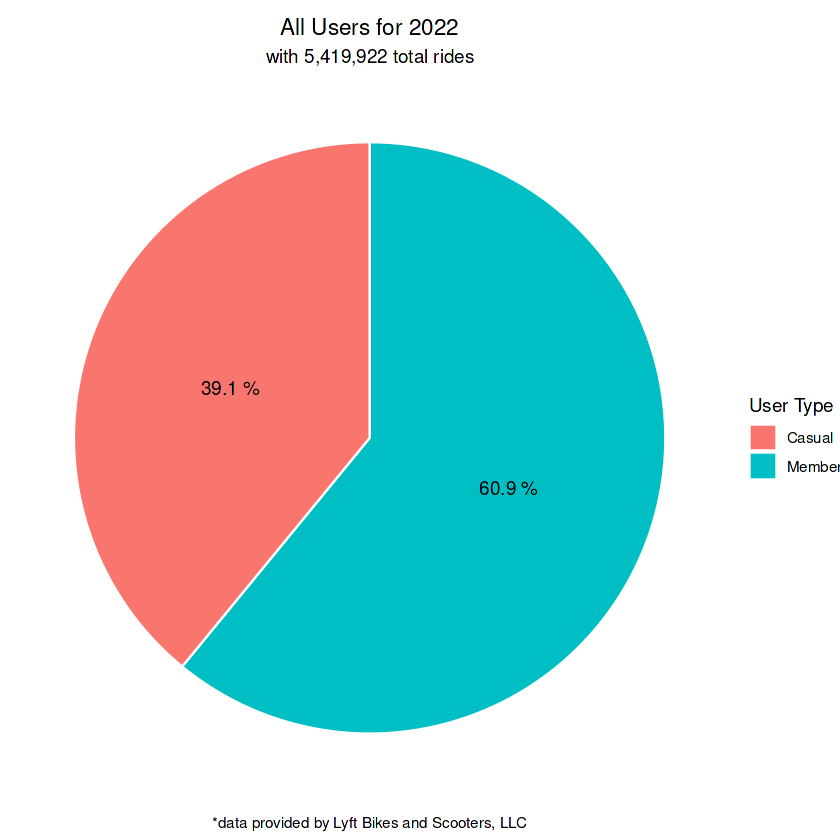

In [21]:
ggplot(ridetotal_usertype1, aes(x = "", y = total_rides, fill = rider_type)) +
  geom_bar(width = 1, stat = "identity", color = "white") +
  coord_polar("y", start = 0)+
  geom_text(aes(y = lab.ypos, label = paste(round(total_rides / sum(total_rides) * 100, 1), "%")))+
  theme_void() +
  scale_fill_discrete(name="User Type", labels=c("Casual","Member")) +
  labs(title="All Users for 2022",
       subtitle="with 5,419,922 total rides",
       caption="*data provided by Lyft Bikes and Scooters, LLC") +
  theme(plot.title = element_text(hjust = 0.5),
        plot.caption = element_text(hjust = 0.5),
        plot.subtitle = element_text(hjust = 0.5)) 

#### Observations: All Users for 2022

* Casual riders represent about 39% of the 5.4 million total riders in 2022.  
* It is the goal of this analysis to discover how to convert these riders into annual members.

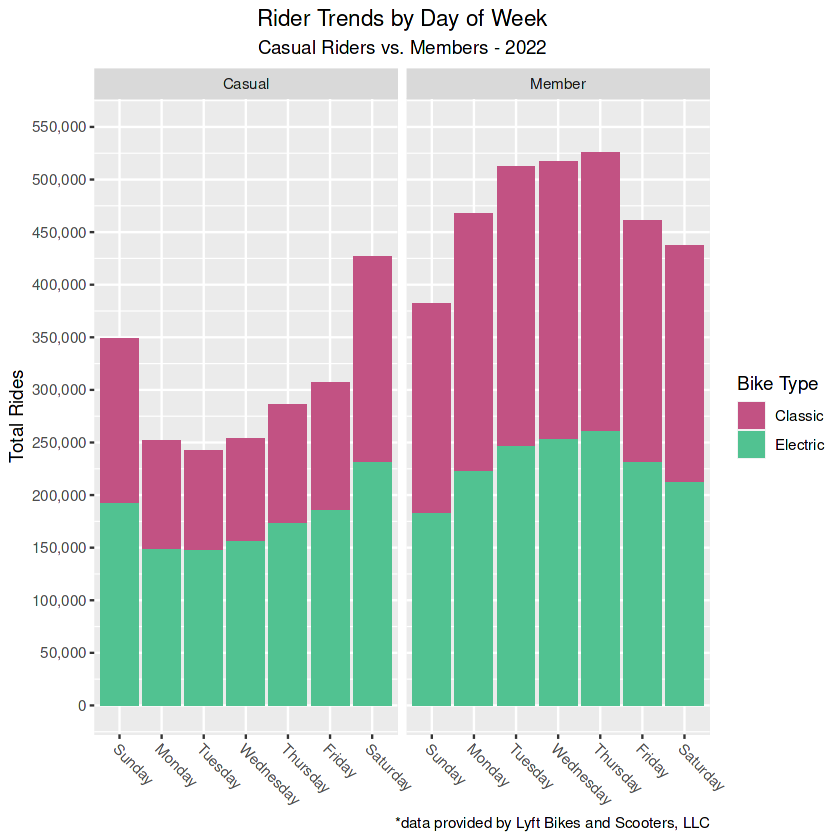

In [22]:
ggplot(ridetotal_dow, aes(x = day_of_week, y = all_rides, fill = bike_type)) +
  geom_bar(position = "stack", stat = "identity") +
  facet_wrap( ~ rider_type, labeller = labeller(rider_type = c("casual" = "Casual",
                                                        "member" = "Member"))) +
  theme(axis.text.x = element_text(angle = -45, vjust = 1, hjust=0),
        plot.title = element_text(hjust = 0.5),
        plot.subtitle = element_text(hjust = 0.5)) +
  xlab(NULL) +
  labs(y="Total Rides",
       title="Rider Trends by Day of Week",
       subtitle="Casual Riders vs. Members - 2022",
       caption="*data provided by Lyft Bikes and Scooters, LLC") +
  scale_fill_manual(values=c('#c25283','#51c291'),
                    name="Bike Type", labels=c("Classic","Electric")) +
  scale_y_continuous(limits=c(0,550000),
                     breaks=seq(0,550000,50000),
                     labels=scales::comma)

#### Observations: Rider Trends By Day of Week for 2022

##### Expected

* Casual rides peak on the weekends
* Casual riders use significantly more electric bikes than classic.

##### Notable

* Member rides peak mid-week, and weekends have the lowest numbers.
* Members are more likely to use classic bikes.

##### Key Takeaways

* Members are more likely to use classic bikes
* Members ride more during the week, and casual riders ride more on the weekends.

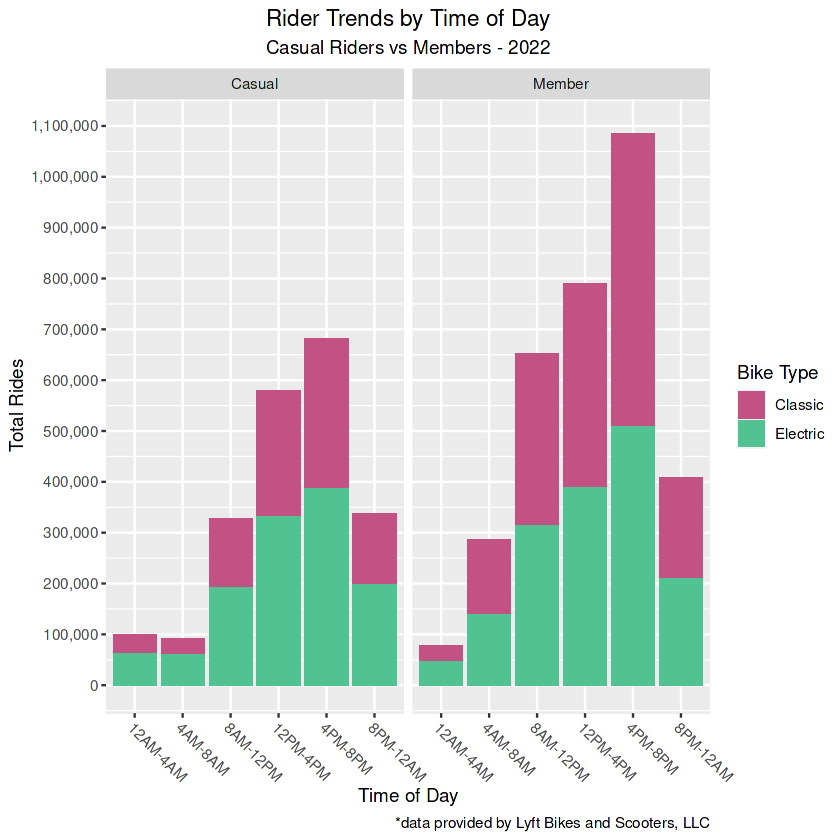

In [23]:
ggplot(ridetotal_tod, aes(x = time_of_day, y = all_rides, fill = bike_type)) +
  geom_bar(position = "stack", stat="identity") +
  facet_wrap( ~ rider_type, labeller = labeller(rider_type = c("casual" = "Casual",
                                                               "member" = "Member"))) +
  theme(axis.text.x = element_text(angle = -45, vjust = 1, hjust=0),
        plot.title = element_text(hjust = 0.5),
        plot.subtitle = element_text(hjust = 0.5)) +
  xlab(NULL) +
  labs(x="Time of Day", y="Total Rides",
       title="Rider Trends by Time of Day",
       subtitle="Casual Riders vs Members - 2022",
       caption="*data provided by Lyft Bikes and Scooters, LLC") +
  scale_fill_manual(values=c('#c25283','#51c291'),
                    name="Bike Type", labels=c("Classic","Electric")) +
  scale_y_continuous(limits=c(0,1100000),
                     breaks=seq(0,1100000,100000),
                     labels=scales::comma) 

#### Observations: Rider Trends By Time of Day for 2022

##### Expected

* Both casual riders and members ride the most in the evenings, 4PM-8PM.

##### Notable 

* There are more casual rides in the late night/early morning hours of 12AM-4AM.
* Member rides start to spike between 4AM and 8AM, where casual rides start to spike later in the morning, 8AM-12PM.
* Both casual riders and members have a similar number of rides between 8PM-12PM, which means this time frame sees a higher proportion of casual riders.

##### Key Takeaways

* Members are more likely than casual members to ride 4AM-8AM, and less likely between 8PM-12PM.

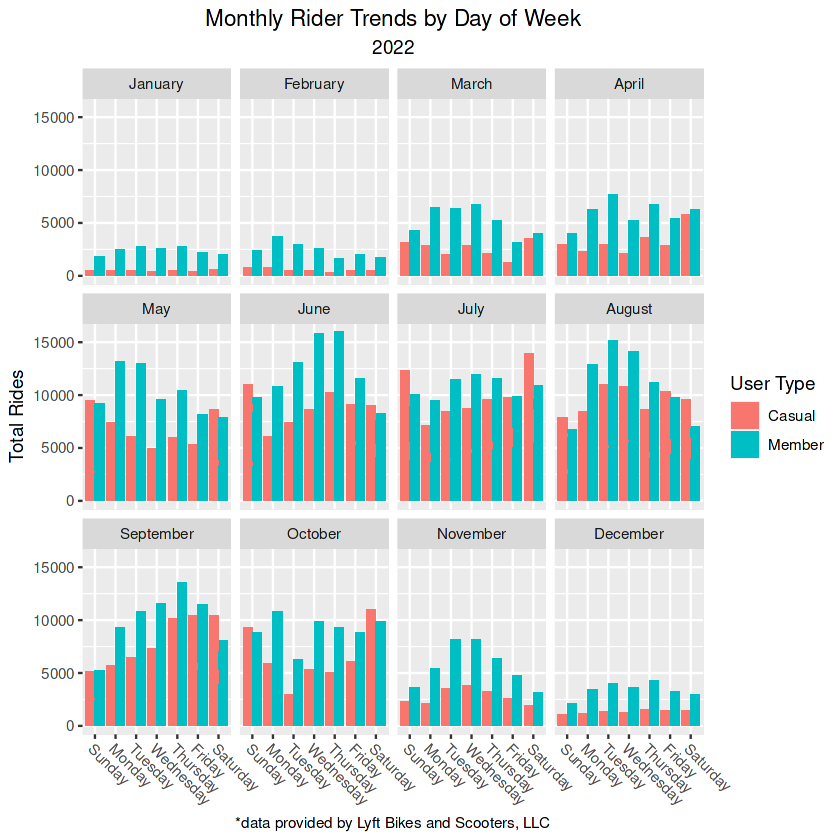

In [24]:
ggplot(ridetotal_month_dow_tod, aes(x = day_of_week, y = all_rides, fill = rider_type)) +
  geom_col(position = "dodge") +
  facet_wrap( ~ month) +
  theme(axis.text.x = element_text(angle = -45, vjust = 1, hjust=0),
        plot.title = element_text(hjust = 0.5),
        plot.subtitle = element_text(hjust = 0.5),
        plot.caption = element_text(hjust = 0.5)) +
  xlab(NULL) +
  labs(y="Total Rides",
       title="Monthly Rider Trends by Day of Week",
       subtitle="2022",
       caption="*data provided by Lyft Bikes and Scooters, LLC") +
  scale_fill_discrete(name="User Type", labels=c("Casual","Member"))

#### Observations: Montly Rider Trends By Day of Week

##### Expected

* Highest number of rides for both groups during summer months.
* Lowest number of rides during winter months, though there are still significantly more member rides.  
* Most months mirror the mid-week peaks we saw previously for members.

##### Notable 

* Members start riding more often than usual on weekends in July and October.
* In September, casual and member rides form a similar weekly pattern that could be explained by summer ending and people getting back to a M-F work/school week.

##### Key Takeaways

* September is when both groups display similar weekly trends, and may be a good time to recruit new members as they start to form riding habits after the summer.

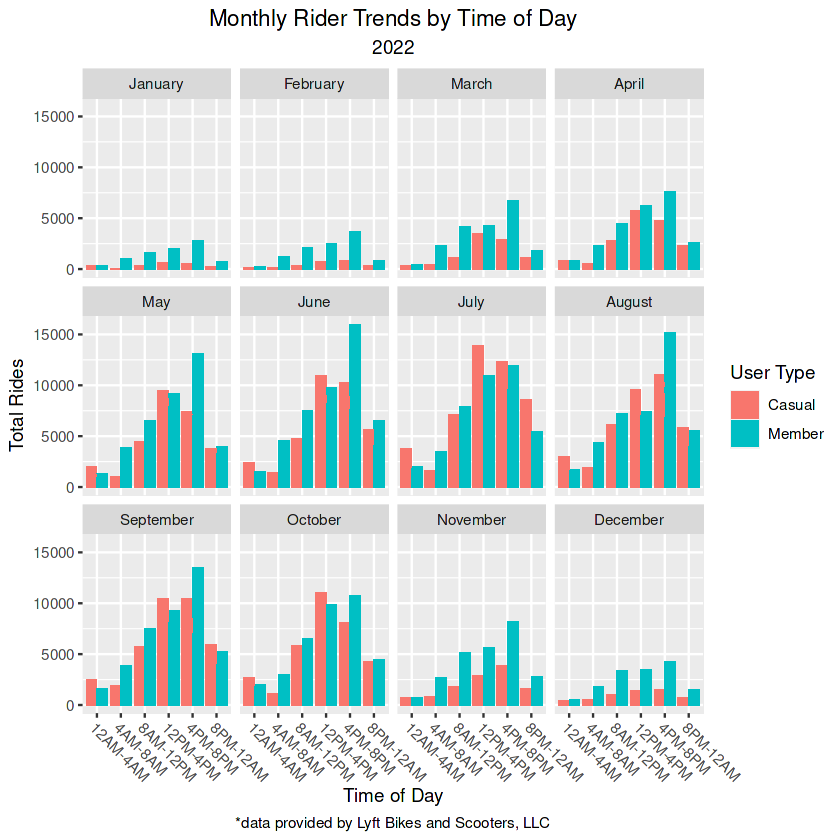

In [25]:
ggplot(ridetotal_month_dow_tod, aes(x = time_of_day, y = all_rides, fill = rider_type)) +
  geom_col(position = "dodge") +
  facet_wrap( ~ month)  +
  theme(axis.text.x = element_text(angle = -45, vjust = 1, hjust=0),
        plot.title = element_text(hjust = 0.5),
        plot.subtitle = element_text(hjust = 0.5),
        plot.caption = element_text(hjust = 0.5))+
  labs(x= "Time of Day", y="Total Rides",
       title="Monthly Rider Trends by Time of Day",
       subtitle="2022",
       caption="*data provided by Lyft Bikes and Scooters, LLC")+
  scale_fill_discrete(name="User Type", labels=c("Casual","Member"))

#### Observations: Monthly Rider Trends By Time of Day

##### Expected

* Daily ride patterns for both groups are very consistent month to month.

##### Notable 

* Member rides start between 4AM-8AM, increasing to an obvious peak between 4PM-8PM.
* Casual rides start later (8AM-12PM), and are more likely than members to start their peak between 12PM-4PM.  
* A larger percentage of casual rides occur in the late evening, when we see a lower percent of member rides.

##### Key Takeaways

* Casual riders ride later, ranging from 8AM to 12AM (midnight).
* Members ride earlier, ranging from 4AM to 8PM.

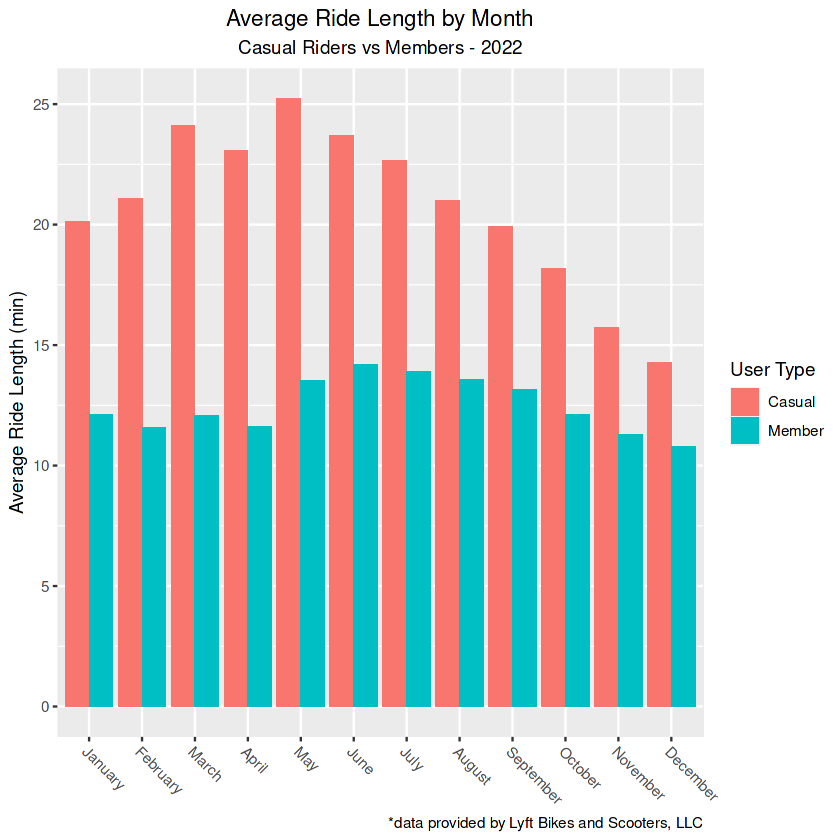

In [26]:
ggplot(ridelength_2022_monthly, aes(x = month, y = weighted_avg, fill = rider_type)) +
  geom_col(position = "dodge") +
  theme(axis.text.x = element_text(angle = -45, vjust = 1, hjust=0),
        plot.title = element_text(hjust = 0.5),
        plot.subtitle = element_text(hjust = 0.5))+
  xlab(NULL) +
  labs(y="Average Ride Length (min)",
       title="Average Ride Length by Month",
       subtitle="Casual Riders vs Members - 2022",
       caption="*data provided by Lyft Bikes and Scooters, LLC") +
  scale_fill_discrete(name="User Type", labels=c("Casual","Member"))

#### Observations: Average Ride Length by Month

##### Expected

* These numbers were surprising and challenged my assumption that members would have longer ride times due to commuting.

##### Notable 

* Casual riders take much longer rides on a consistent basis throughout the year.
* Members have consistent ride lengths throughout the year with only a 2-3 minute rise during the summer months.

##### Key Takeaways

* Casual riders take much longer rides throughout the year than members.

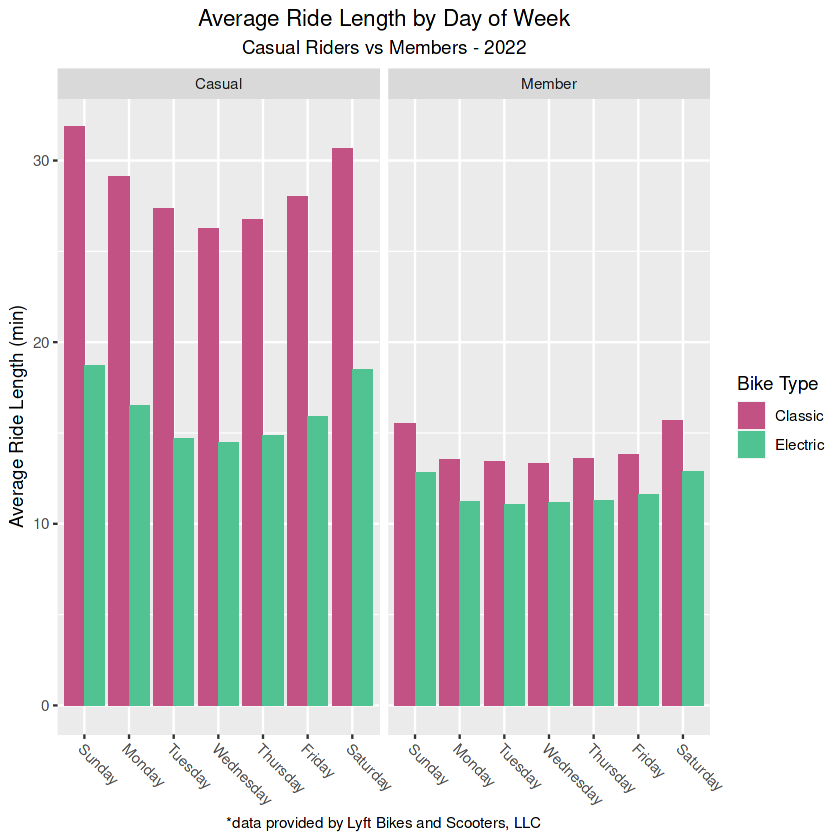

In [27]:
ggplot(ridelength_dow, aes(x = day_of_week, y = weighted_avg, fill = bike_type)) +
  geom_bar(position = "dodge", stat = "identity") +
  facet_wrap( ~ rider_type, labeller = labeller(rider_type = c("casual" = "Casual",
                                                               "member" = "Member"))) +
  theme(axis.text.x = element_text(angle = -45, vjust = 1, hjust=0),
        plot.title = element_text(hjust = 0.5),
        plot.caption = element_text(hjust = 0.5),
        plot.subtitle = element_text(hjust = 0.5))+
  xlab(NULL) +
  labs(y="Average Ride Length (min)",
       title="Average Ride Length by Day of Week",
       subtitle="Casual Riders vs Members - 2022",
       caption="*data provided by Lyft Bikes and Scooters, LLC") +
  scale_fill_manual(values=c('#c25283','#51c291'),
                    name="Bike Type", labels=c("Classic","Electric"))

#### Observations: Average Ride Length by Day of Week

##### Expected

* Casual riders have much longer rides on the weekends.
* Members take slightly longer rides on the weekends.

##### Notable 

* Casual riders spend the most amount of time on classic bikes. 
* Members spend a relatively equal amount of time on classic and electric bikes throughout the week.

##### Key Takeaways

* Members tend to take shorter rides (10-15 min) and are more likely to use classic bikes.

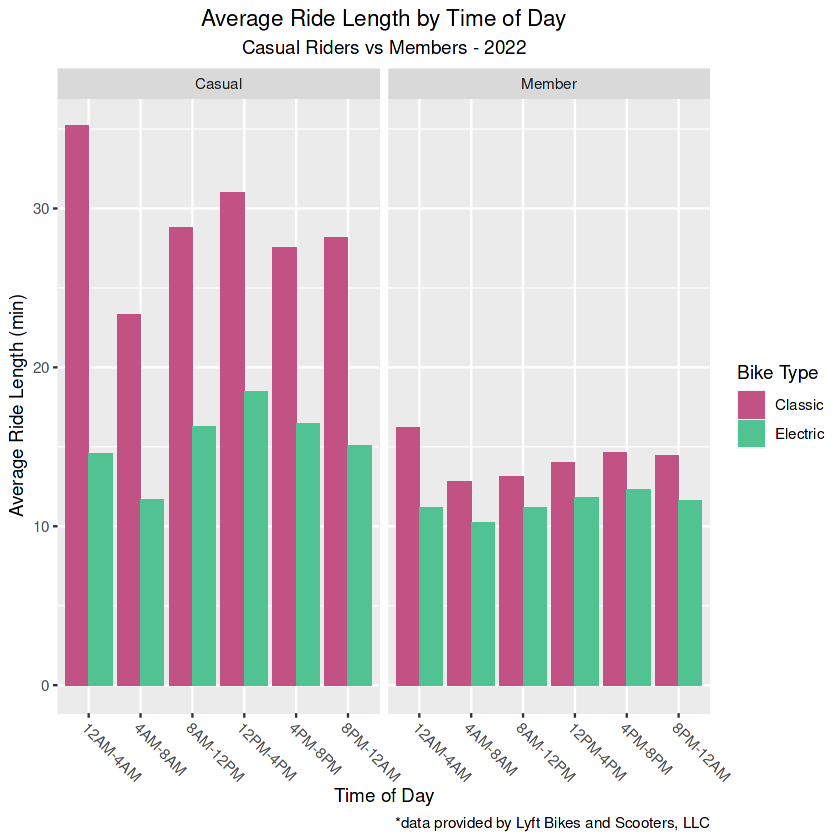

In [28]:
ggplot(ridelength_tod, aes(x = time_of_day, y = weighted_avg, fill = bike_type)) +
  geom_bar(position = "dodge", stat = "identity") +
  facet_wrap( ~ rider_type, labeller = labeller(rider_type = c("casual" = "Casual",
                                                               "member" = "Member"))) +
  theme(axis.text.x = element_text(angle = -45, vjust = 1, hjust=0),
        plot.title = element_text(hjust = 0.5),
        plot.subtitle = element_text(hjust = 0.5)) +
  labs(x="Time of Day",y="Average Ride Length (min)",
       title="Average Ride Length by Time of Day",
       subtitle="Casual Riders vs Members - 2022",
       caption="*data provided by Lyft Bikes and Scooters, LLC") +
  scale_fill_manual(values=c('#c25283','#51c291'),
                    name="Bike Type", labels=c("Classic","Electric"))

#### Observations: Average Ride Length by Time of Day

##### Expected

* Casual riders take the shortest rides in the 4AM-8AM time frame.

##### Notable 

* Member have a consistent ride length range of around 10-15 minutes across all time frames and bike types.
* Casual riders take the longest rides on classic bikes between 12AM-4AM, with a total gap in ride length of around 25min.

##### Key Takeaways

* Casual ride lengths during the 4AM-8AM time frame most closely resemble average member ride lengths.
* Members have consistent ride lengths regardless of time of day.

`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'


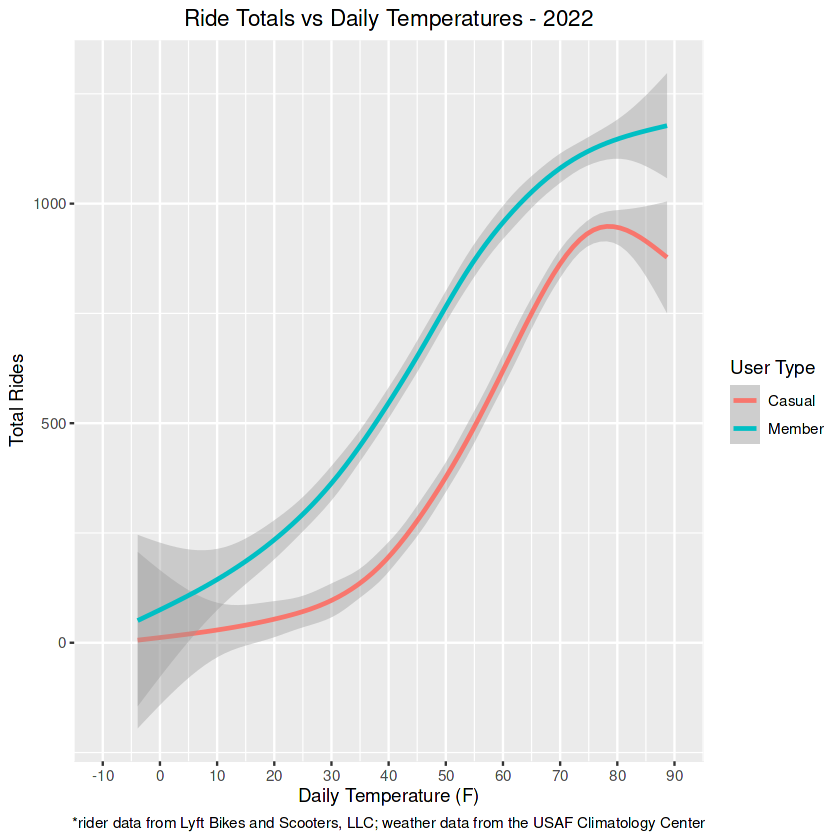

In [29]:
ggplot(data=bikeshare_data) +
  geom_smooth(mapping=aes(x=temp_avg,y=total_rides,color=rider_type)) +
  labs(x="Daily Temperature (F)",y="Total Rides",
       title="Ride Totals vs Daily Temperatures - 2022",
       caption="*rider data from Lyft Bikes and Scooters, LLC; weather data from the USAF Climatology Center") +
  scale_color_discrete(name="User Type", labels=c("Casual","Member")) +
  scale_x_continuous(limits=c(-10, 90), breaks=seq(-10,90,10)) +
  theme(plot.title = element_text(hjust = 0.5),
        plot.caption = element_text(hjust = 0.5))

#### Observations: Total Rides vs. Temperature by User Type

##### Expected

* Positive correlation between number of rides and temperatures for both members and casual riders.

##### Notable 

* Casual rides peak around 75 degrees and begin to drop off. 
* In contrast, member rides still increase above 75 degrees,but not as quickly.

##### Key Takeaways

* Members are more likely to continue riding in the hottest temperatures(>75 degrees) when casual rides start to decrease.  
* Casual rides start increasing at 40 degrees and begin to decrease at 75 degrees.

`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'


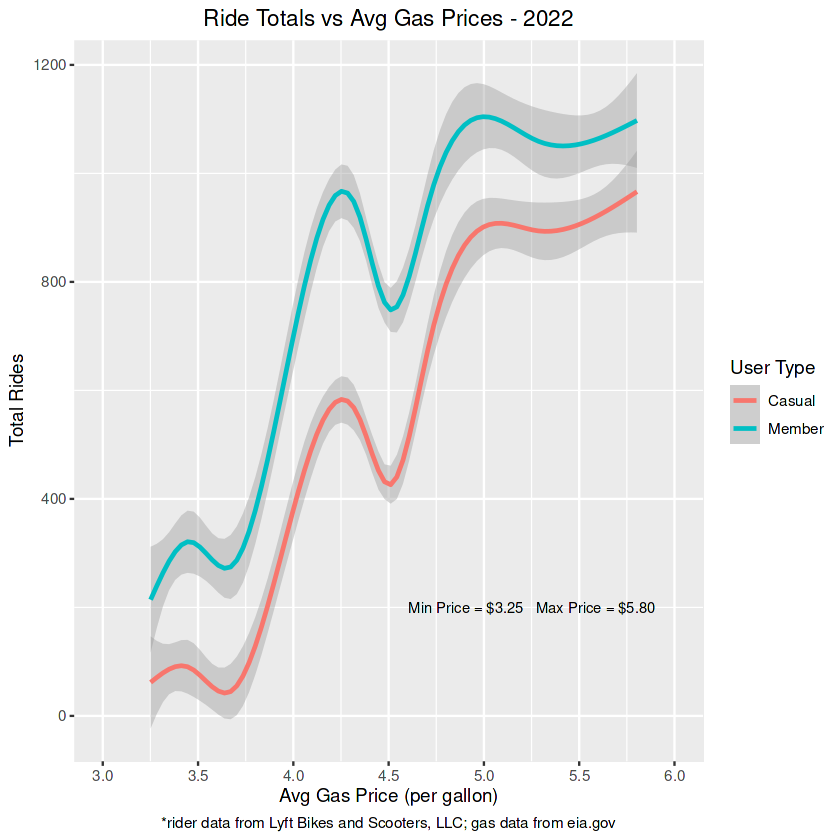

In [30]:
ggplot(data=bikeshare_data) +
  geom_smooth(mapping=aes(x=avg_price_gallon,y=total_rides,color=rider_type)) +
  labs(x="Avg Gas Price (per gallon)",
       y="Total Rides",
       title="Ride Totals vs Avg Gas Prices - 2022",
       caption="*rider data from Lyft Bikes and Scooters, LLC; gas data from eia.gov")+
  scale_color_discrete(name="User Type", labels=c("Casual","Member")) +
  scale_x_continuous(limits=c(3, 6), breaks=seq(3,6,0.5)) +
  theme(plot.title = element_text(hjust = 0.5),
        plot.caption = element_text(hjust = 0.5)) +
  annotate("text", x=5.25, y=200, 
           label="Min Price = $3.25   Max Price = $5.80",
           size=3)

#### Observations: Total Rides vs. Gas Prices by User Type

##### Expected

* Positive correlation between number of rides and average gas price.

##### Notable 

* Drastic dip in both member and casual rides between 4.25 and 4.50 per gallon.
* Looking at the next graph, we see that gas prices dropped from 4.50 in November, the beginning of the winter season. This may explain the dip.

##### Key Takeaways

* More research may be needed to claim a causal relationship here due to the influence of other variables (most notably, season).

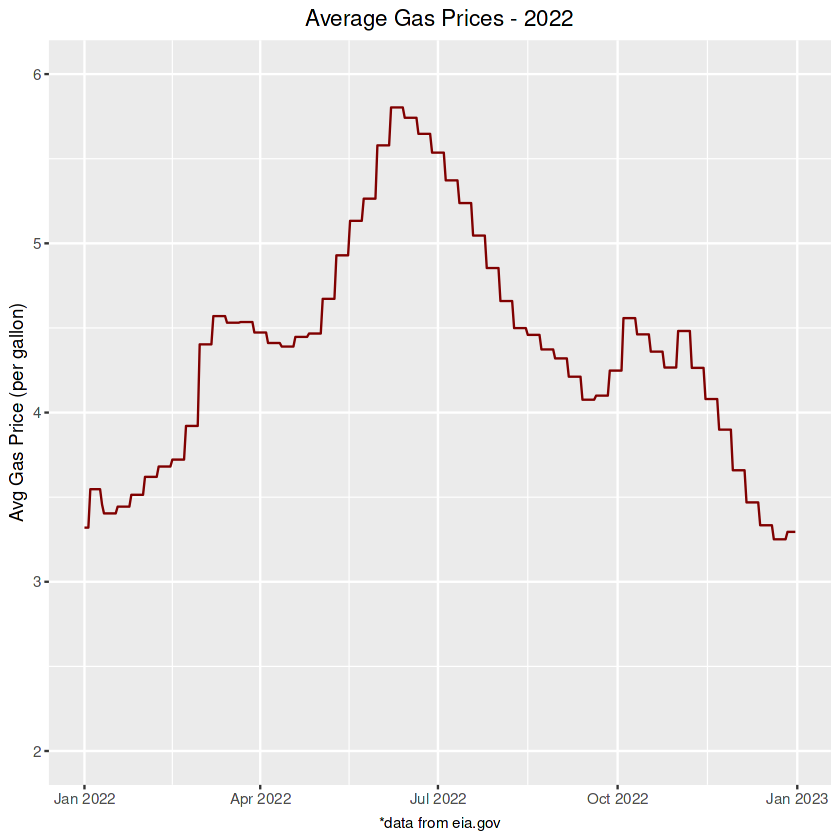

In [31]:
ggplot(gas_prices,aes(x=date, y=avg_price_gallon)) +
  geom_line(color='#800000') +
  xlab(NULL) +
  labs(y="Avg Gas Price (per gallon)",
       title="Average Gas Prices - 2022",
       caption="*data from eia.gov")+
  theme(plot.title = element_text(hjust = 0.5),
        plot.caption = element_text(hjust = 0.5)) +
  scale_y_continuous(limits=c(2,6))

# Summary and Discussion

### Bike Choice

**Members are more likely to use classic bikes than casual riders.**  This was a bit surprising and challenged my assumption that members would ride more electric bikes as a form of transportation as well as leisure.  

With no further information provided about different levels of membership, such as a less expensive “classic only” membership, it is impossible to speculate whether they use these bikes due to economic factors or preference.  

However, we can still use this information at face value to contrast with **casual riders, who prefer electric bikes.**  Casual riders who ride classic bikes are exhibiting “member-like” behaviors and may be good candidates for conversion to member status.

### Daily Trends

**Members ride more during the week, and casual riders ride more on the weekends.**  There are several possible reasons for this.  Members may be commuting more than casual riders.  They may be local to the area and have the ability to ride for leisure during the week, saving their weekends for other activities.  Further study would be necessary to learn the true rationale, but the difference in trends between members and casual riders is clear and consistent in the data.

**Both groups display pretty similar weekly trends in September**, and may be a good time to recruit new members as they start to form riding habits after the summer.  My theory is that people are going back to school and work after the summer, but still doing outdoor activities and enjoying the warmer weather.  **Casual riders settle into this new routine of riding bikes less on Sundays, and increasing slowly during the week, then riding the most on Thursday, Fridays, and Saturdays.**  While members do ride less on Saturdays, September still represents the month in which both groups have the most similar ride patterns.

**Members are more likely than casual members to ride 4AM-8AM.**  This could be explained by early commutes or early morning exercise.  **They are less likely than casual members to ride between 8PM-4AM**, which could be due to more casual riders using bike riding as a late night activity or even as emergency transportation after a night out.  More information would need to be gathered about why these trends exist in order to do any more than speculate. 

**In general, casual riders ride during a later part of the day, starting around 8AM and ending between 12AM.  In contrast, members tend to get started earlier in the day, around 4AM and ending closer to 8PM.**  Members could represent a more health-conscious group who start their days early with a bit of exercise, or they could be the 9-5 workers and students who use the bikes as transportation.  More data is required to determine the motivation to ride earlier.  Of course, regardless of the reason, there is a clear difference in time of day between casual riders and members.

### Temperature Trends

**Members are more likely to continue riding in the hottest temperatures(>75 degrees) when casual rides start to decrease. Casual rides start increasing at 40 degrees and begin to decrease at 75 degrees, where members rides increase at a faster rate from 0 to 40 degrees.**  

The riders in both groups who ride during very hot or very cold temperatures are likely doing so out of necessity or passion.  Therefore, these casual riders would benefit from membership.

### Ride Length Trends

**Casual riders take much longer rides throughout the year than members, averaging 20-25 min.** This may highlight the idea that casual riders are riding for leisure, using the ride itself as an activity, rather than transportation.  This would explain the longer casual rides. 

**Members tend to take shorter rides (10-15 min) and have more consistent ride lengths throughout the day.** Members may have shorter, but more frequent, trips due to shorter commutes to work, shopping, and entertainment.  However, this cannot be confirmed without individual user data to look at repeat trips.

**Casual ride lengths during the 4AM-8AM time frame most closely resemble average member ride lengths.**  This could mean that casual riders are using the service for similar reasons as members during this time, such as early morning commutes or for exercise.  This makes it more likely that these riders could be excellent candidates for membership.

# Recommended Action Steps

1. Use digital marketing to target casual riders who mirror riding patterns unique to members is a great place to start.  Focus on casual riders who:

* ride between 4AM-8AM.
* ride during the week.
* take shorter trips (10-15 min).
* ride classic bikes.
* ride above 75 degrees (late summer) or below 40 degrees (winter). 
	
2. Implement peak pricing (if not already in place; pricing information was not provided as a part of the project scenario) during 4PM-8PM on weekdays since these are the most popular times for both groups. In addition, offer specials that allow the casual riders above to apply their single ride cost to an annual membership for a limited time.  This will help attract casual riders who happen to ride at peak times, but use the service in a manner more consistent with members (such as shorter rides, classic bikes, etc).

3. Run general ads more heavily during August and September when casual weekly riding habits begin to  mirror that of members, and overall usage is still relatively high from the summer.  October is too late, as casual trends go back to the norm of more rides on weekends than weekdays and start to drop overall from there.

# Conclusion and Future Exploration

This analysis provided us with information about how riders use this service.  The differences in how members and casual riders use the bikes have been key in helping us identify a subgroup of casual riders who are excellent candidates for membership.  

Going forward, it would be advantageous to learn more about individual rider behaviors, such as frequency and location of repeat rides, using bikes from the same starting and ending stations, or using bikes within a certain radius of their residence.  

A comparison of actual ride length to how long the bike was "checked out" (which is the current basis for “ride length” could also answer some questions.  There were several "rides" that lasted 25 hours (which I assume is just the max, before it goes into a second ‘ride' the next day).  It is, of course, highly unlikely that anyone would ride for 25 hours continuously, so do they keep it with them at work or home for easier access when needed?  How much did they actually ride it during that time?  Learning more details about this could give us more insight into how members and casual riders use the service.  This type of analysis would increase the subgroup of casual riders that would benefit from membership.

Additionally, performing a sentiment analysis using reviews, surveys, and social media posts would be a great way to evaluate the current membership program.  What are people saying about the service?  Why did members decide to join?  What do they use the bikes for?  We can use this information to target new members who share the same habits, or to update membership benefits so that it attracts a wider group.

Finally, to learn more about outside factors that affect the number of rides (such as gas prices), we need to retrieve data on a daily scale and do a full statistical comparison between gas prices, car prices, temperature, weather events such as snow or rain, rideshare prices for Uber and Lyft, and any major events during that time period.  Examining changes in membership rates during these times can also lead to new marketing initiatives and updates to the member program.
